In [ ]:
import pandas as pd
df = pd.read_csv('full_text_labeled.csv', delimiter=",")

# Display the DataFrame
display(df)

,full_text,class
0,@sobat_anies 2. Keliru,1
1,@dccomm_gov Padat,0
2,@islah_bahrawi @kangdede78 Pakar radikal radik...,1
3,@lengkongtweets @Avolanza Emg otak bengkok lu ...,1
4,Puji Anies Baswedan sebagai Pemimpin Masa Depa...,2
...,...,...
418,"dalam memperkuat sistem ketahanan pangan, meng...",2
419,"Begitu pentingnya air bagi kehidupan ini, memb...",2
420,"@kananboekankiri @sigitwid Pak prabowo, terima...",1
421,@BANGSAygSUJUD Sedari awal sy tidak percaya Pr...,1


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  423 non-null    object
 1   class      423 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.7+ KB


In [ ]:
df_class = df['class']
#Menghapus data yang tidak dibutuhkan
df = df.drop(['class'], axis=1)
df

,full_text
0,@sobat_anies 2. Keliru
1,@dccomm_gov Padat
2,@islah_bahrawi @kangdede78 Pakar radikal radik...
3,@lengkongtweets @Avolanza Emg otak bengkok lu ...
4,Puji Anies Baswedan sebagai Pemimpin Masa Depa...
...,...
418,"dalam memperkuat sistem ketahanan pangan, meng..."
419,"Begitu pentingnya air bagi kehidupan ini, memb..."
420,"@kananboekankiri @sigitwid Pak prabowo, terima..."
421,@BANGSAygSUJUD Sedari awal sy tidak percaya Pr...


In [ ]:
!pip install transformers
!pip install sastrawi
#Import stopword dari sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#Membuat stemmer sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#Membuat stopword sastrawi
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
#Membuat kamus kata baku
kata_baku = pd.read_csv('https://drive.google.com/uc?id=1-4tVP2_bGtV1K1StQgavSIUokfSfvOv5')
kata_baku = kata_baku.set_index("kataAlay")["kataBaik"].to_dict()

#Stopword tambahan
stop_words = list(pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/stopwords300.txt', header=None)[0])

In [ ]:
import re
def cleaning(text):
    text = str(text)

    # Mengubah setiap kata menjadi lowercase
    text =  text.lower()

    # Menghapus Link Dengan Pattern http/https dan www
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(@\w+|#\w+)', '', text)

    # Menghapus Tag HTML
    text = re.sub('<.*?>', '', text)

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Mengganti baris baru (enter) dengan spasi
    text = re.sub("\n", " ", text)

    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub('(s{2,})', ' ', text)

    # Menghapus kata stopword dalam tweet dan merubahnya menjadi kata baku
    temp_text_split = []
    final_text = []
    text_split = text.split(' ')

    for i in range(len(text_split)):

        #Merubah kata menjadi kata baku
        if text_split[i] not in stop_words:
              if text_split[i] in kata_baku:
                  text_split[i] = kata_baku[text_split[i]]

              #Menghapus data yang kurang dari 3 karakter
              if len(list(str(text_split[i]))) > 3:
                 temp_text_split.append(str(text_split[i]))

    for i in range(len(temp_text_split)):
        if temp_text_split not in final_text:
            final_text.append(str(temp_text_split[i]))

    text = ' '.join(final_text)

    #Menghapus kata stopword dengan library sastrawi
    text = stopword.remove(text)

    #Melakukan stemming dengan library sastrawi
    text = stemmer.stem(text)

    # Mengembalikan Hasil Preprocessing Text
    return text

In [ ]:
#Melakukan cleaning pada dataframe, dan membuat kolom baru bernama text_clean
df['text_clean'] = df['full_text'].apply(cleaning)
#Mengembalikan label pada dataframe
df['class'] = df_class
#Menghapus NaN
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)

In [ ]:
df.head()

,full_text,text_clean,class
0,@sobat_anies 2. Keliru,keliru,1
1,@dccomm_gov Padat,padat,0
2,@islah_bahrawi @kangdede78 Pakar radikal radik...,pakar radikal radikul bawakata agama dukung ba...,1
3,@lengkongtweets @Avolanza Emg otak bengkok lu ...,memang otak bengkok kamu panas asal kamu tahu ...,1
4,Puji Anies Baswedan sebagai Pemimpin Masa Depa...,puji baswedan pimpin masa tokoh muhammadiyah o...,2


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


def tokenize_text(text):
    """
    fungsi untuk merubah text kedalam lis / tokenisasi

    """
    tokenize_text = text.split()
    return tokenize_text


def lemmatisasi_text(token_list, stopwords):
    """
    fungsi untuk extraksi kata menjadi bentuk dasarnya

    """
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stopwords = stopwords + stopwords_tambahan()
    # stopwords.remove("baik")
    # stopwords.remove("terus")
    # stopwords.remove("tetap")
    # stopwords.remove("lanjut")
    # stopwords.remove("enak")
    list_kata = []
    for token in token_list:
        try:
            token = dictionary_normalisasi(token)
        except Exception as _:
            token = token
        if token not in stopwords:
            list_kata.append(stemmer.stem(token))

    return " ".join(list_kata)


def dictionary_normalisasi(kata):
    dictio = {
        'diskus': 'diskusi',
        'dongok': 'dungu',
        'kwalitas': 'kualitas',
        'panjenengan': 'anda',
        'uwes': 'sudah',
        'sing': 'yang',
        'erti': 'arti',
        'filosopi': 'filosofi',
        'ngandelin': 'andal',
        'gimn': 'bagaimana',
        'smakin': 'semakin',
        'bkin': 'bikin',
        'followers': 'pengikut',
        'frekwensi': 'frekuensi',
        'rumahbkalian': 'rumah kalian',
        'isin': 'malu',
        'siaap': 'siap',
        'jend': 'jendral',
        'bodol': 'bodoh',
        'milu': 'pemilu',
        'greng': 'goreng',
        'awat': 'gawat',
        'jdinya': 'jadinya',
        'sybolnya': 'symbolnya',
        'beduke': 'beduknya',
        'aamin': 'amin',
        'njaar': 'anjing',
        'syaa': 'insya',
        'sabaaar': 'sabar',
        'dangerous': 'bahaya',
        'rich': 'kaya',
        'yabg': 'yang',
        'disain': 'desain',
        'dadak': 'mendadak',
        'mingkem': 'diam',
        'piye': 'bagaimana',
        'nesu': 'merajuk',
        'lapo': 'kenapa',
        'duwe': 'punya',
        'togak': 'tonggak',
        'berbohonh': 'berbohong',
        'milu': 'pemilu',
        'mensupport': 'mendukung',
        'membutuhkam': 'membutuhkan',
        'perhati': 'perhatian',
        'sodara': 'saudara',
        'berame': 'ramai',
        'kwalitas': 'kualitas',
        'ndoroh': 'tuan',
        'djokowi': 'jokowi',
        'sepanduk': 'spanduk',
        'alhamdulillqh': 'alhamdulillah',
        'semangkin': 'semakin',
        'moga': 'semoga',
        'justeru': 'justru',
        'scra': 'secara',
        'mbuka': 'membuka',
        'bkta': 'bukti',
        'mbuat': 'membuat',
        'kemiskan': 'kemiskinan',
        'jngn': 'jangan',
        'sdng': 'sedang',
        'ahlivsulap': 'ahli sulap',
        'bangkitbersamaet': 'bangkit bersama',
        'sera': 'serah',
        'keli': 'geli',
        'memalujan': 'memalukan',
        'perhati': 'perhatian',
        'gilaklo': 'gila kamu',
        'sbagai': 'sebagai',
        'sbgi': 'sebagai',
        'president': 'presiden',
        'knapa': 'kenapa',
        'nape': 'kenapa',
        'cemana': 'bagaimana',
        'bjir': 'anjing',
        'kalaw': 'kalau',
        'inovative': 'inovatif',
        'sholr': 'sholat',
        'mbelgedhes': 'buruk',
        'kasiam': 'kasihan',
        'jatu': 'jatuh',
        'sono': 'sana',
        'inten': 'intens',
        'propensi': 'provinsi',
        'indonesi': 'indonesia',
        'inibmuncul': 'ini muncul',
        'siip': 'sip',
        'maaih': 'masih',
        'nehiii': 'tidak',
        'libat': 'melibatkan',
        'hiram': 'hitam',
        'bubaaarrr': 'bubar',
        'wafres': 'wapres',
        'elmen': 'elemen',
        'pabowo': 'prabowo',
        'bgaimn': "bagaimana",
        'bangke': 'bangkai',
        'asuuoo': 'anjing',
        'ngotorjn': 'kotor',
        'wako': 'waktu',
        'nuntaskan': 'menuntaskan',
        'kntl': 'kontol',
        'jing': 'anjing',
        'pokokke': 'pokoknya',
        'brkta': 'berkat',
        'mnykai': 'menyukai',
        'anjeng': 'anjing',
        'incer': 'incar',
        'sangking': 'saking',
        'jang': 'jangan',
        'buln': 'bulan',
        'prabowodua': 'prabowo dua',
        'hemattt': 'hemat',
        'edan': 'gilan',
        'balihonye': 'balihonya',
        'usilin': 'usil',
        'genz': 'gen z',
        'kulo': 'saya',
        'gaamau': 'tidak mau',
        'what': 'apa',
        'anwa': 'anwar',
        'mboten': 'tidak',
        'ngapusi': 'berbohong',
        'bgtu': 'begitu',
        'drun': 'kadrun',
        'israellll': "israel",
        'njing': 'anjing',
        'telujuk': 'telunjuk',
        'kesiap': 'kesiapan',
        'cincong': 'bawel',
        'mbacot': 'berbicara',
        'lbih': 'lebih',
        'kepansan': 'kepanasan',
        'lwat': 'lewat',
        'skkap': 'sikap',
        'tlong': 'tolong',
        'ptran': 'putaran',
        'dongoooo': 'dungu',
        'nyet': 'monyet',
        'yidak': 'tidak',
        'nisa': 'bisa',
        'bengokk': 'bodoh',
        'warbysa': 'luar biasa',
        'kenasikat': 'kena sikat',
        'sbnarnya': 'sebenarnya',
        'cuco': 'cocok',
        'mksudnya': 'maksudnya',
        'bebastugaskan': 'bebas tugaskan',
        'taon': 'tahun',
        'dungkul': 'dengkul',
        'tfak': 'tidak',
        'menjelekkkan': 'menjelekkan',
        'manfa': 'manfaat',
        'turus': 'terus',
        'bhwa': 'bahwa',
        'njabat': 'pejabat',
        'apaaaaa': 'apa',
        'ngebokeppp': 'bokep',
        'besarrr': 'besar'


    }
    return dictio[kata]


def stopwords_tambahan():
    return [
        'suzy', 'barbie', 'cabe', 'oppenheimer', 'yeonjun park jihoon',
        'keysia', 'tang', 'mergo', 'nggih',
        'donk', 'dong', 'gera', 'bhaa', 'kaing', 'kans',
        'erickthohirnews', 'sooor', 'sebagai', 'hahaha',
        'wowww', 'hhhhhhhh', 'cuiihh', 'haaa', 'jiahhhh',
        'wkwkwkkw', 'nich', 'hmmm', 'wkwkwk', 'hayuuuu', 'dech',
        'kwkwkwkk', 'kwkww', 'meong', 'haaa', 'owalah', 'wkkwkwkk', 'jadi'

    ]

In [ ]:

df['tokens'] = df['text_clean'].apply(lambda x: tokenize_text(x))
df.head()

,full_text,text_clean,class,tokens
0,@sobat_anies 2. Keliru,keliru,1,[keliru]
1,@dccomm_gov Padat,padat,0,[padat]
2,@islah_bahrawi @kangdede78 Pakar radikal radik...,pakar radikal radikul bawakata agama dukung ba...,1,"[pakar, radikal, radikul, bawakata, agama, duk..."
3,@lengkongtweets @Avolanza Emg otak bengkok lu ...,memang otak bengkok kamu panas asal kamu tahu ...,1,"[memang, otak, bengkok, kamu, panas, asal, kam..."
4,Puji Anies Baswedan sebagai Pemimpin Masa Depa...,puji baswedan pimpin masa tokoh muhammadiyah o...,2,"[puji, baswedan, pimpin, masa, tokoh, muhammad..."


In [ ]:
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

df['lemma'] = df['tokens'].apply(lambda x: lemmatisasi_text(x,stopwords))
df.head()

,full_text,text_clean,class,tokens,lemma
0,@sobat_anies 2. Keliru,keliru,1,[keliru],keliru
1,@dccomm_gov Padat,padat,0,[padat],padat
2,@islah_bahrawi @kangdede78 Pakar radikal radik...,pakar radikal radikul bawakata agama dukung ba...,1,"[pakar, radikal, radikul, bawakata, agama, duk...",pakar radikal radikul bawakata agama dukung ba...
3,@lengkongtweets @Avolanza Emg otak bengkok lu ...,memang otak bengkok kamu panas asal kamu tahu ...,1,"[memang, otak, bengkok, kamu, panas, asal, kam...",memang otak bengkok kamu panas asal kamu tahu ...
4,Puji Anies Baswedan sebagai Pemimpin Masa Depa...,puji baswedan pimpin masa tokoh muhammadiyah o...,2,"[puji, baswedan, pimpin, masa, tokoh, muhammad...",puji baswedan pimpin masa tokoh muhammadiyah o...


<Axes: xlabel='class', ylabel='count'>

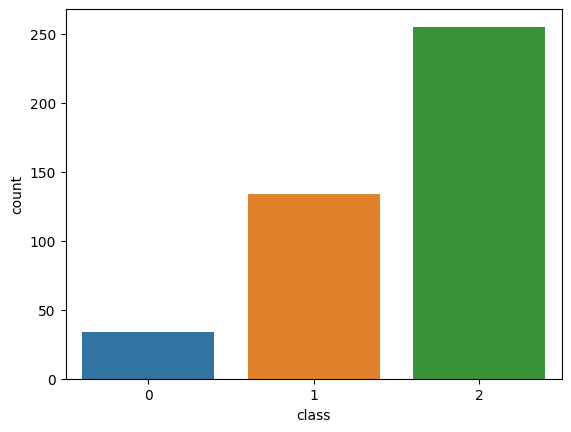

In [ ]:
import seaborn as sns
df["class"].isnull().sum()
sns.countplot(x='class', data=df)

In [ ]:
data_negatif = df[df["class"]==2]
data_positif = df[df["class"]==1]
data_netral = df[df["class"]==0]

negatif_list = data_negatif["lemma"].tolist()
positif_list = data_positif["lemma"].tolist()
netral_list = data_netral["lemma"].tolist()

filtered_negatif = ("").join(str(negatif_list))
filtered_negatif = filtered_negatif.lower()

filtered_positif = ("").join(str(positif_list))
filtered_positif = filtered_positif.lower()

filtered_netral = ("").join(str(netral_list))
filtered_netral = filtered_netral.lower()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()